In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [39]:
df = pd.read_csv('data/0_labelled_documents.csv')
df = df[df['INCLUDE']==1]
print(df.shape)
df.head()

(450, 104)


,id,title,content,0 - relevant,10 - 3. Quantitative,10 - 4. Qualitative,11 - countries,12 - policy name,2 - 0. Mitigation,2 - 1. Adaptation,...,8 - 11. Ocean systems,8 - 12. Food,"8 - 13. Human settlements, industry and infrastructure","8 - 14. Human health, well-being and security",8 - 15. Cross-sectoral,9 - 0. Ex-post,9 - 1. Ex-ante,9 - 2. Ex-ante (IAM),INCLUDE,random
2,3556,Will economic restructuring in China reduce tr...,We calculate carbon dioxide (CO2) emissions em...,1.0,1.0,NaN,China,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,1.0,0
5,4793,An emerging equilibrium in the EU emissions tr...,The European Union's Emissions Trading Scheme ...,1.0,1.0,0.0,0,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.0,1.0,0
10,17205,A fuel surcharge policy for reducing road traf...,This paper proposes a car pricing policy based...,1.0,1.0,0.0,NaN,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
11,17339,Innovation and Climate Change Policy,This paper examines whether climate change pol...,1.0,NaN,0.0,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,1.0,0
13,20095,"Promoting the ""Development dividend"" of climat...",Future climate change policy in developing cou...,1.0,0.0,0.0,ThailandPhilippinesIndia,0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0


['3 - 1. Analysis of an existing policy / concrete proposal',
 '3 - 2. Analysis of a generic policy',
 '3 - 3. Broader governance and policy']

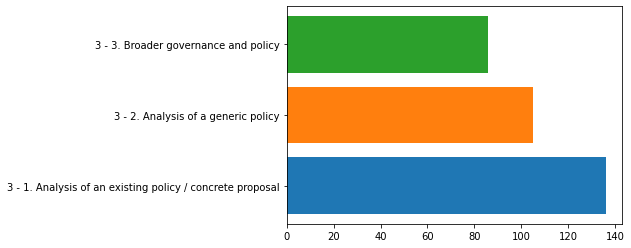

In [40]:
policy = [x for x in df.columns if re.match("^3 - ",x) and "Not policy" not in x]

fig, ax = plt.subplots()
for i,x in enumerate(policy):
    ax.barh(i, df[x].sum())
    
ax.set_yticks(range(len(policy)))
ax.set_yticklabels(policy)
policy

In [61]:
p1 = [x for x in df.columns if re.match("^4 - ",x) and "Not policy" not in x]
p2 = [x for x in df.columns if re.match("^5 - ",x) and "Not policy" not in x]
hrs = []
for i in range(len(p1)):
    hrs.append(len([x for x in p2 if f"- {i+1}." in x]))
    
hrs

[4, 7, 4, 3, 2]

['4 - 1. Economic instruments', '4 - 2. Regulatory Instruments', '4 - 3. Information, education and training', '4 - 4. Governance, strategies and targets', '4 - 5. Agreements']


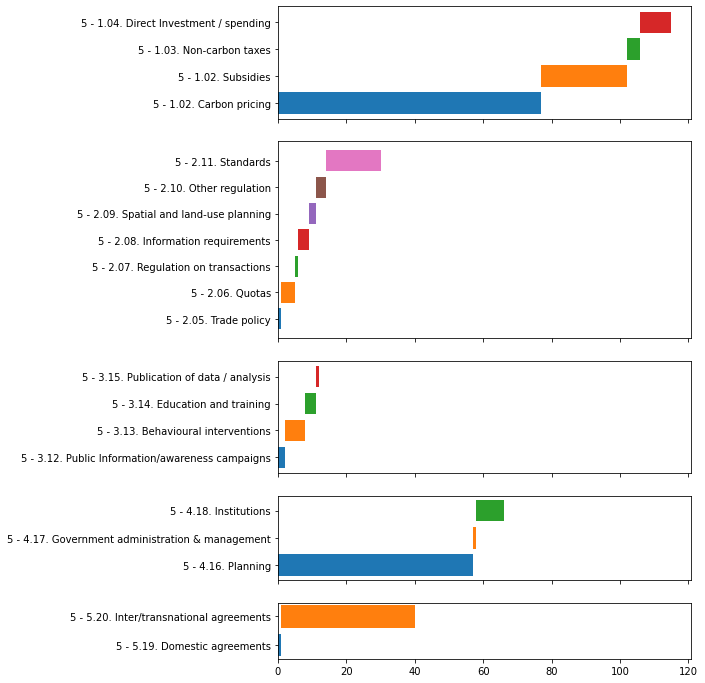

In [64]:


print(p1)

fig, axs = plt.subplots(len(p1), figsize=(7.4,12),gridspec_kw={'height_ratios': hrs},sharex=True)
for i,x in enumerate(p1):
    ax = axs[i]
    cindex = x.split(". ")[0].replace("4 -","5 -") + "."
    p2sub = [p for p in p2 if cindex in p]
    
    l = 0
    for j,p in enumerate(p2sub):
        n =  df[p].astype("float").sum()
        ax.barh(j, n, left=l)
        l+=n
    
    ax.set_yticks(range(len(p2sub)))
    ax.set_yticklabels(p2sub)

In [55]:
cindex

'4 - 5.'

In [52]:
p2

['5 - 1.02. Carbon pricing',
 '5 - 1.02. Subsidies',
 '5 - 1.03. Non-carbon taxes',
 '5 - 1.04. Direct Investment / spending',
 '5 - 2.05. Trade policy',
 '5 - 2.06. Quotas',
 '5 - 2.07. Regulation on transactions',
 '5 - 2.08. Information requirements',
 '5 - 2.09. Spatial and land-use planning',
 '5 - 2.10. Other regulation',
 '5 - 2.11. Standards',
 '5 - 3.12. Public Information/awareness campaigns',
 '5 - 3.13. Behavioural interventions',
 '5 - 3.14. Education and training',
 '5 - 3.15. Publication of data / analysis',
 '5 - 4.16. Planning',
 '5 - 4.17. Government administration & management',
 '5 - 4.18. Institutions',
 '5 - 5.19. Domestic agreements',
 '5 - 5.20. Inter/transnational agreements']